## "All men must die, but we are not men" `Importing`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## "You know nothing, Snow" `Mean Reverting Indicators`

In [29]:
def RSI(array, n):
    "RELATIVE STRENGTH INDEX"
    g = pd.Series(array).diff()
    l = g.copy()
    g[g < 0] = 0 
    l[l > 0] = 0
    RS = g.ewm(n, min_periods = n).mean() / l.abs().ewm(n, min_periods = n).mean()
    return 100 - 100 / (1 + RS)

## "I’m going to break the wheel" `Meta Parameters`

In [77]:
#pairs
pairs = [('A', 'MTD'), ('ADP', 'PAYX'), ('FFIV', 'STX'), ('FFIV', 'ZBRA'), ('MPWR', 'TER'), ('ADI', 'TXN'), ('AMZN', 'CRM'), ('ADBE', 'ANSS'), ('AJG', 'BRO'), ('AJG', 'NDAQ'), ('ABT', 'LLY'), ('CRL', 'IDXX'), ('CRL', 'TECH'), ('AIZ', 'CB'), ('AIZ', 'CINF'), ('AIZ', 'WRB'), ('BK', 'PRU'), ('ANTM', 'DGX'), ('ANTM', 'LH'), ('CL', 'KMB'), ('AVB', 'EQR'), ('AVB', 'ESS'), ('EIX', 'PPL'), ('AEE', 'LNT')]

In [25]:
#rolling window for RSI estimation
n = 14

In [27]:
#High and low limits for signal construction
RSI_high = 70
RSI_low = 30

## "Chaos isn’t a pit. Chaos is a ladder." `Load Data`

In [55]:
dataraw = pd.read_csv("data/equity_data_full", index_col = 1, parse_dates=True).iloc[:,[7,5]]
dataraw.columns = ["Ticker", "Close"]
dataraw.head()

,Ticker,Close
date,,
2010-01-04,A,20.234426
2010-01-05,A,20.014631
2010-01-06,A,19.943520
2010-01-07,A,19.917660
2010-01-08,A,19.911200


In [56]:
data = pd.pivot_table(data = dataraw, values='Close', index=dataraw.index, columns='Ticker')
data.head()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.234426,19.485846,38.659100,29.149055,NaN,22.173862,8.74,17.688671,33.420715,37.090000,...,13.977690,19.793602,43.664391,32.727928,NaN,18.842617,55.248089,28.670000,11.434559,NaN
2010-01-05,20.014631,21.101254,38.429310,29.199450,NaN,22.015659,8.53,17.545759,33.627266,37.700001,...,13.811926,19.544035,43.834873,32.338852,NaN,18.778179,56.997044,28.620001,11.837728,NaN
2010-01-06,19.943520,20.470240,38.764416,28.734993,NaN,21.807489,8.40,17.643198,33.984741,37.619999,...,13.838450,19.411457,44.213745,32.551907,NaN,18.643930,56.978626,28.400000,12.867094,NaN
2010-01-07,19.917660,20.823603,38.754837,28.681877,NaN,21.457775,8.40,17.789358,33.952984,36.889999,...,13.778772,19.216480,44.074821,32.978020,NaN,18.638561,58.285725,27.690001,14.308211,NaN
2010-01-08,19.911200,20.470240,38.908028,28.872568,NaN,21.690914,8.23,17.880299,33.817913,36.689999,...,13.785402,19.497246,43.898018,32.978020,NaN,18.643930,57.061478,27.600000,14.076602,NaN


In [59]:
data_return = data.apply(lambda x: np.log(x/x.shift(1)))
data_return.head()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010922,0.079644,-0.005962,0.001727,NaN,-0.007160,-0.024321,-0.008112,0.006161,0.016313,...,-0.011930,-0.012689,0.003897,-0.011959,NaN,-0.003426,0.031166,-0.001745,0.034651,NaN
2010-01-06,-0.003559,-0.030360,0.008682,-0.016034,NaN,-0.009501,-0.015358,0.005538,0.010574,-0.002124,...,0.001919,-0.006807,0.008606,0.006567,NaN,-0.007175,-0.000323,-0.007717,0.083382,NaN
2010-01-07,-0.001297,0.017115,-0.000247,-0.001850,NaN,-0.016166,0.000000,0.008250,-0.000935,-0.019595,...,-0.004322,-0.010095,-0.003147,0.013005,NaN,-0.000288,0.022681,-0.025318,0.106160,NaN
2010-01-08,-0.000324,-0.017115,0.003945,0.006626,NaN,0.010806,-0.020446,0.005099,-0.003986,-0.005436,...,0.000481,0.014505,-0.004020,0.000000,NaN,0.000288,-0.021228,-0.003256,-0.016320,NaN


In [60]:
pair_spread = pd.read_csv("data/pair_spread.csv", index_col = 0, parse_dates=True)
pair_spread.head()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-04,10.114575,-13.074679,38.415380,47.907081,-13.463746,7.723976,-139.085484,-38.627537,-4.135744,2.615338,...,1.595445,-2.007364,4.526249,-113.130848,-90.208996,12.661978,3.102517,22.319009,-19.086367,2.546998
2010-01-05,10.147680,-13.195876,37.260250,46.457673,-13.678657,7.777878,-137.127937,-36.321355,-4.077153,2.493169,...,2.292388,-1.207932,4.414731,-109.178602,-87.946522,12.900192,2.888985,21.699258,-18.745286,2.128318
2010-01-06,10.152247,-13.588893,37.607362,46.744271,-14.069213,7.848618,-139.093636,-35.909463,-3.895003,2.506566,...,2.171960,-1.330775,3.869507,-105.885371,-84.815691,13.056939,2.069259,20.944484,-18.547101,1.890545
2010-01-07,10.295945,-14.246331,37.365751,46.364666,-14.568303,7.614540,-140.139604,-36.826044,-4.003650,2.581823,...,2.386580,-1.137612,4.506117,-105.486408,-82.852458,13.053915,1.675501,20.703204,-18.282677,1.643144
2010-01-08,10.126633,-14.311136,38.219345,47.113729,-14.718168,7.390181,-137.020943,-37.534897,-3.863252,2.489177,...,2.477087,-1.101022,4.886894,-105.249817,-82.413218,12.607672,1.940794,20.642958,-18.273039,1.223295


## "A Pednekar always pays his debts." `Signal Construction`

In [182]:
pair_rsi = pair_spread.apply(lambda x: RSI(x, n)).dropna()
pair_rsi.head()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,33.567700,66.490226,50.233207,52.716428,61.798674,29.604721,77.983187,67.607994,70.452776,83.906518,...,70.059934,64.050747,67.185563,80.128710,72.431791,60.545843,49.449480,34.470323,79.699384,15.693874
2010-01-26,31.590030,66.932040,41.059985,47.170014,52.951369,28.286627,65.750883,68.269214,67.699329,84.295925,...,63.591002,56.803755,67.560764,72.588552,64.782963,61.667340,53.639741,39.928815,80.446837,20.283547
2010-01-27,31.445647,65.937236,38.050662,43.998710,53.011069,27.812919,68.893636,43.415717,59.534727,73.125660,...,64.766128,60.209671,60.698480,76.901430,69.845515,64.686824,46.004234,38.975029,85.143478,27.080675
2010-01-28,26.996482,66.592935,36.460942,40.313114,64.093316,25.359528,74.752398,44.168085,69.547369,75.038122,...,64.125939,60.552678,59.972862,78.564288,73.138919,63.528290,45.906640,38.748138,85.458493,23.209783
2010-01-29,20.833964,64.132142,37.079259,35.950981,65.224473,31.983007,75.758851,42.198834,68.736562,76.494077,...,58.684283,60.912279,61.746392,79.061937,70.181937,61.533050,47.484984,44.641111,86.513154,21.986691


In [183]:
pair_signal = pair_rsi.apply(lambda x: np.where(x > RSI_high, -1, np.where(x < RSI_low, 2, 0))) # Both Buy and Sell signal
#pair_signal = pair_rsi.apply(lambda x: np.where(x > RSI_high, -1,0)) # Sell signal only
pair_signal.head()

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,0,0,0,0,0,2,-1,0,-1,-1,...,-1,0,0,-1,-1,0,0,0,-1,2
2010-01-26,0,0,0,0,0,2,0,0,0,-1,...,0,0,0,-1,0,0,0,0,-1,2
2010-01-27,0,0,0,0,0,2,0,0,0,-1,...,0,0,0,-1,0,0,0,0,-1,2
2010-01-28,2,0,0,0,0,2,-1,0,0,-1,...,0,0,0,-1,-1,0,0,0,-1,2
2010-01-29,2,0,0,0,0,0,-1,0,0,-1,...,0,0,0,-1,-1,0,0,0,-1,2


<AxesSubplot:>

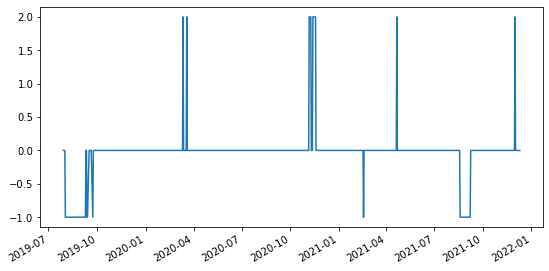

In [184]:
pair_signal.iloc[:,0].tail(600).plot(figsize = (9,4.5))

<AxesSubplot:>

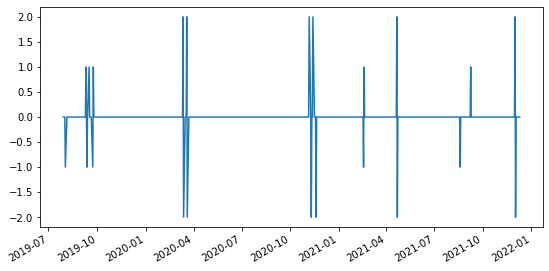

In [185]:
pair_signal.iloc[:,0].diff().tail(600).plot(figsize = (9,4.5))
#1 is short the spread and start the buy signal,2 is close the signal (RSI is now too high)

In [187]:
pair_signal = pair_signal.apply(lambda x: x.diff())
pair_signal = pair_signal.apply(lambda x: np.where(x == 1, -1, np.where(x == 2, 0, np.nan))).ffill().fillna(0)
pair_signal

#### Now pair_signal contains positions

<AxesSubplot:>

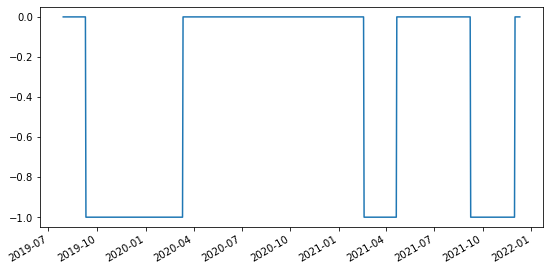

In [189]:
pair_signal.iloc[:,0].tail(600).plot(figsize = (9,4.5))

In [190]:
### VVVVV Imp (to truncate returns file to be similar dates as signal)
data_return = data_return.loc[pair_signal.index,:].copy(deep=True)

In [106]:
# 'Load 'betas' from Spread notebook'
%store -r betas
betas

[0.09579564414343489,
 2.00521941595171,
 1.3858042904295038,
 0.21182137356023995,
 3.3730277292601256,
 0.8186608334218165,
 14.594251765206428,
 1.6961814194711107,
 2.534084611206278,
 0.7583986578325043,
 0.5437890959374124,
 0.5443549770594529,
 0.8213030213098205,
 0.9432927690960973,
 1.2717512485505902,
 1.9573284081446356,
 0.512655504772942,
 3.32337165641579,
 1.8422473620736213,
 0.45727987270923504,
 2.6661884085105183,
 0.5780766458782427,
 2.578318627219795,
 1.4994971997117528]

## "Hold the door!" `BackTesting`

In [219]:
strategy_return = pd.DataFrame(index = pair_signal.index,
                              columns = pair_signal.columns)
strategy_return2 = strategy_return.copy()

In [226]:
for i in range(0,len(pairs)):
    print(pairs[i], "done")
    strategy_return.iloc[:,i] = (pair_signal.iloc[:,i] * data_return.loc[:,pairs[i][0]] - pair_signal.iloc[:,i] * betas[i] * data_return.loc[:,pairs[i][1]]).cumsum().apply(np.exp)
    strategy_return2.iloc[:,i] = (pair_signal.iloc[:,i] * data_return.loc[:,pairs[i][0]] - pair_signal.iloc[:,i] * betas[i] * data_return.loc[:,pairs[i][1]]).apply(np.exp) - 1

('A', 'MTD') done
('ADP', 'PAYX') done
('FFIV', 'STX') done
('FFIV', 'ZBRA') done
('MPWR', 'TER') done
('ADI', 'TXN') done
('AMZN', 'CRM') done
('ADBE', 'ANSS') done
('AJG', 'BRO') done
('AJG', 'NDAQ') done
('ABT', 'LLY') done
('CRL', 'IDXX') done
('CRL', 'TECH') done
('AIZ', 'CB') done
('AIZ', 'CINF') done
('AIZ', 'WRB') done
('BK', 'PRU') done
('ANTM', 'DGX') done
('ANTM', 'LH') done
('CL', 'KMB') done
('AVB', 'EQR') done
('AVB', 'ESS') done
('EIX', 'PPL') done
('AEE', 'LNT') done


In [227]:
strategy_return

,"('A', 'MTD')","('ADP', 'PAYX')","('FFIV', 'STX')","('FFIV', 'ZBRA')","('MPWR', 'TER')","('ADI', 'TXN')","('AMZN', 'CRM')","('ADBE', 'ANSS')","('AJG', 'BRO')","('AJG', 'NDAQ')",...,"('AIZ', 'CINF')","('AIZ', 'WRB')","('BK', 'PRU')","('ANTM', 'DGX')","('ANTM', 'LH')","('CL', 'KMB')","('AVB', 'EQR')","('AVB', 'ESS')","('EIX', 'PPL')","('AEE', 'LNT')"
2010-01-25,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-26,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.343595e+00,1.000000,0.997105,1.000000,...,1.008259,1.000000,1.000000,1.000000,1.029509,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-27,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.304886e+00,1.000000,1.003661,1.000000,...,1.007508,1.000000,1.000000,1.000000,0.992500,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-28,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,9.611535e-01,1.000000,0.971563,1.000000,...,1.005386,1.000000,1.000000,1.000000,0.966561,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-29,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,8.402053e-01,1.000000,0.970917,1.000000,...,1.018027,1.000000,1.000000,1.000000,0.978699,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,0.82112,2.616711,1.550126,0.304331,17.144054,1.017566,9.596341e+08,1.803736,9.387680,1.248245,...,1.937755,2.182374,0.799274,1.897434,2.243456,1.050852,1.659940,0.858019,1.920993,2.128806
2021-12-07,0.82112,2.635352,1.599107,0.296590,17.144054,1.005460,1.475073e+09,1.794877,9.387680,1.267399,...,1.937755,2.182374,0.795304,1.962248,2.298904,1.050852,1.656881,0.860430,1.964497,2.122549
2021-12-08,0.82112,2.640813,1.559202,0.299931,17.144054,0.996558,1.421236e+09,1.793836,9.387680,1.279311,...,1.937755,2.182374,0.792467,1.940338,2.282954,1.050852,1.701909,0.850763,1.949996,2.116190
2021-12-09,0.82112,2.615748,1.520412,0.302616,17.144054,0.997943,1.288407e+09,1.772490,9.387680,1.275838,...,1.937755,2.182374,0.785019,1.827991,2.058593,1.050852,1.672664,0.855351,1.933419,2.108048


## "What do we say to the God of death?" `Performance Metrics`

In [228]:
no_years = (strategy_return.index[-1].to_pydatetime() - strategy_return.index[1].to_pydatetime()).days/365

In [229]:
print("CAGR in %")
print(round((strategy_return.iloc[-1,:]**(1/no_years) - 1)*100,2))

CAGR in %
('A', 'MTD')         -1.65
('ADP', 'PAYX')       8.56
('FFIV', 'STX')       3.61
('FFIV', 'ZBRA')     -9.61
('MPWR', 'TER')      27.02
('ADI', 'TXN')        0.09
('AMZN', 'CRM')     489.83
('ADBE', 'ANSS')      4.79
('AJG', 'BRO')       20.74
('AJG', 'NDAQ')       2.03
('ABT', 'LLY')       -1.82
('CRL', 'IDXX')      -1.12
('CRL', 'TECH')       0.26
('AIZ', 'CB')        -1.69
('AIZ', 'CINF')       5.73
('AIZ', 'WRB')        6.79
('BK', 'PRU')        -1.95
('ANTM', 'DGX')       5.41
('ANTM', 'LH')        6.40
('CL', 'KMB')         0.42
('AVB', 'EQR')        4.40
('AVB', 'ESS')       -1.37
('EIX', 'PPL')        5.74
('AEE', 'LNT')        6.60
Name: 2021-12-10 00:00:00, dtype: float64


In [236]:
print("Sharpe Ratio")
print(round(np.sqrt(253)*strategy_return2.mean()/strategy_return2.std(),3))

Sharpe Ratio
('A', 'MTD')       -0.010
('ADP', 'PAYX')     0.568
('FFIV', 'STX')     0.289
('FFIV', 'ZBRA')   -0.346
('MPWR', 'TER')     0.687
('ADI', 'TXN')      0.055
('AMZN', 'CRM')     1.982
('ADBE', 'ANSS')    0.323
('AJG', 'BRO')      0.822
('AJG', 'NDAQ')     0.245
('ABT', 'LLY')     -0.099
('CRL', 'IDXX')     0.013
('CRL', 'TECH')     0.097
('AIZ', 'CB')      -0.069
('AIZ', 'CINF')     0.425
('AIZ', 'WRB')      0.418
('BK', 'PRU')      -0.103
('ANTM', 'DGX')     0.336
('ANTM', 'LH')      0.364
('CL', 'KMB')       0.092
('AVB', 'EQR')      0.301
('AVB', 'ESS')     -0.101
('EIX', 'PPL')      0.336
('AEE', 'LNT')      0.546
dtype: float64


## "That's what I do: I drink and I know things." `Exhibits`

Text(0.5, 1.0, 'Return characteristics')

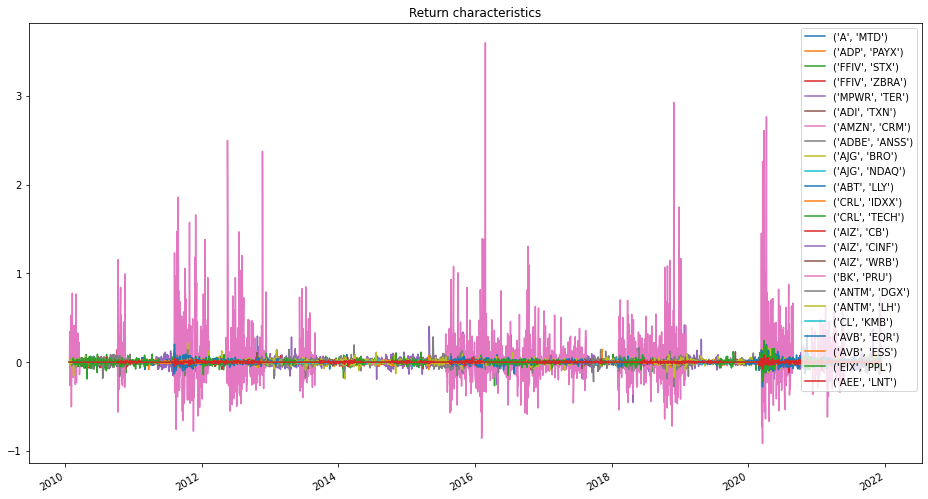

In [238]:
strategy_return2.plot(figsize = (16,9))
plt.title("Daily Return characteristics of Pairs")

Text(0.5, 1.0, 'Stategy Cumulative Return')

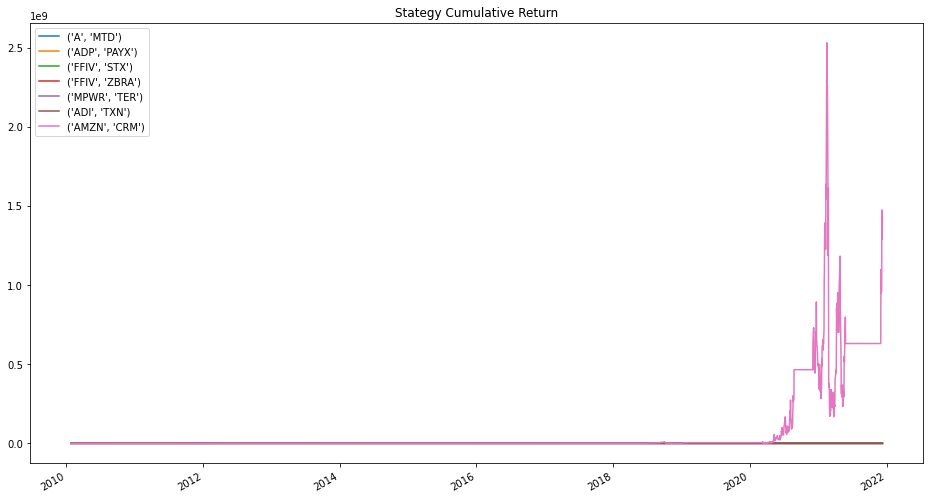

In [239]:
strategy_return.iloc[:,:7].plot(figsize = (16,9))
plt.title("Stategy Cumulative Return")

Text(0.5, 1.0, 'Stategy Cumulative Return')

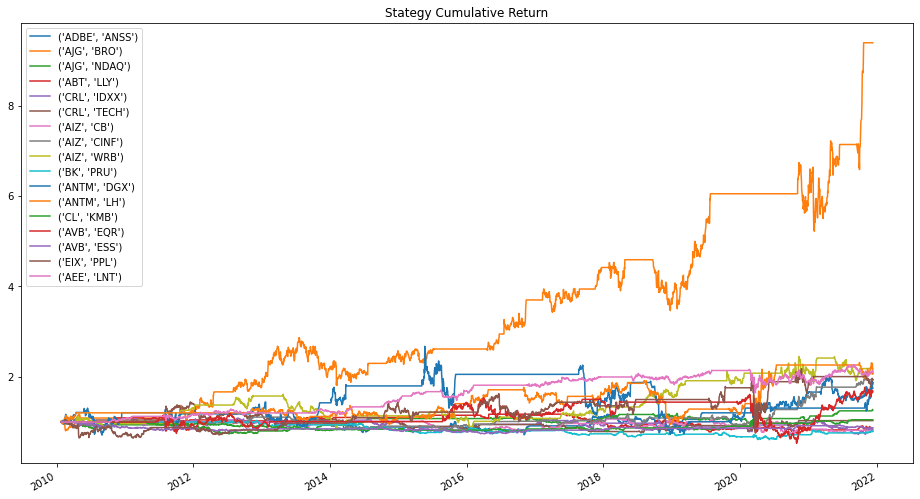

In [240]:
strategy_return.iloc[:,7:].plot(figsize = (16,9))
plt.title("Stategy Cumulative Return")

Text(0.5, 1.0, 'Stategy Cumulative Return')

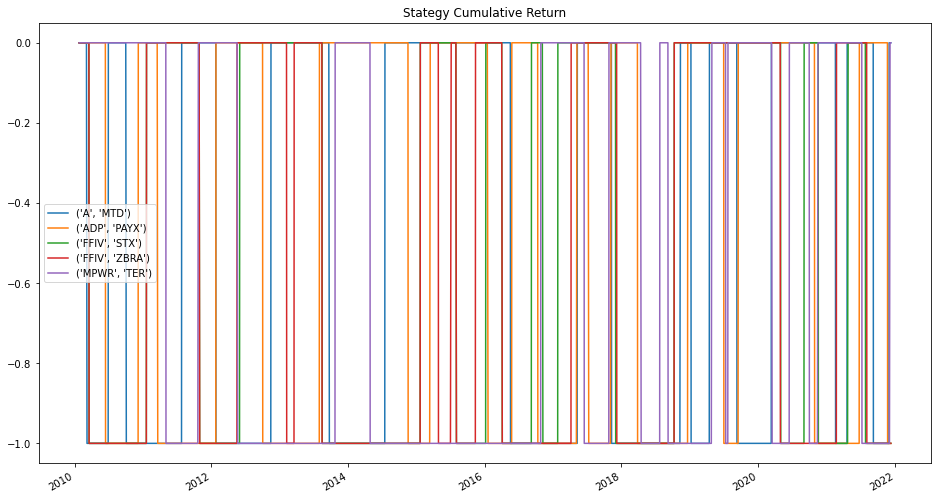

In [249]:
pair_signal.iloc[:,:5].plot(figsize = (16,9))
plt.title("Stategy Cumulative Return")

<AxesSubplot:>

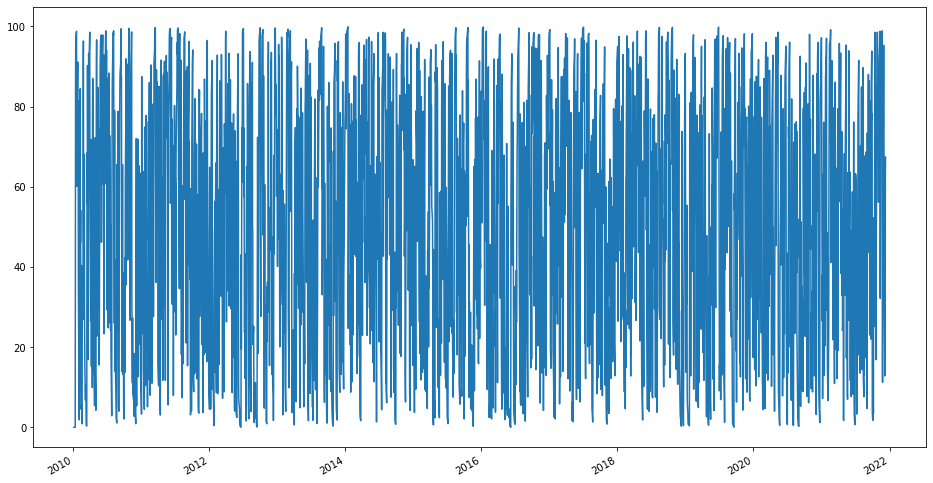

In [250]:
RSI(pair_spread.iloc[:,1],1).plot(figsize=(16,9))